# **Introduction to Machine Learning Chapter 4.1**
# **Backpropagation  - How to determine the weights and the biases -**
---

## inport libraries

In [1]:
import numpy as np                  # for scientific computing (e.g. culclations with array)
import pandas as pd                 # for data manipulation and analysis
import matplotlib.pyplot as plt     # for visualization

## Define classes and functions

In [2]:
class Linear:
  def __init__(self, w, b):
    self.w = w # weight
    self.b = b # bias

  def forward(self, x):
    p = np.dot(x, self.w) + self.b
    return p

class Sigmoid:
  def forward(self, x):
    y = 1 / (1 + np.exp(-x))
    return y

# Binary Crossentropy function
def binary_crossentropy(t, y):
    bce = -1 * np.sum(t * np.log(y) + (1 - t)*np.log(1 - y)) / y.shape[0]
    return bce

# Mean Squared Error function
def mean_squared_error(t, y):
    mse =  np.sum((y - t) ** 2) / y.shape[0]
    return mse


## **Example 4.1** Basic idea for training neural network

In [3]:
np.set_printoptions(precision=4) #　Display up to 3 decimal places

# Input data
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Initialize with trial weights and bias
w = np.array([[10.0],
              [10.0]])
b = np.array([-15.0])   # Adjusted bias

t = np.array([[0],
              [0],
              [0],
              [1]])


linear1 = Linear(w,b)
sigmoid1 = Sigmoid()

p = linear1.forward(x)
y = sigmoid1.forward(p)

print(y)

[[3.0590e-07]
 [6.6929e-03]
 [6.6929e-03]
 [9.9331e-01]]


## Binary Crossentropy

In [4]:
print(binary_crossentropy(t, y))

0.005036587842406932


### Mean Squared Error (MSE)

In [5]:
print((y - t) ** 2)
mse =  np.sum((y - t) ** 2) / y.shape[0]
print(mse)

[[9.3576e-14]
 [4.4794e-05]
 [4.4794e-05]
 [4.4794e-05]]
3.359569014441912e-05


## 🤔 **Exercise 4.1**
Find weights and biases so that the binary crossentropy loss is less than 0.1. Write down the values of weights, bias binary cross entropy.




## 🤔 **Exercise 4.2**

Find a model that successfully classifies the spiral dataset using Neural network playground. The model should be as simple as possible. In other words, it is better to have one hidden layer and fewer neurons.
Paste a screenshot of the learning results that were successfully classified.



Paste your screenshot HERE.

---
# **Backpropagation**
---

## 🤔 **Exercise 4.3**

Calculate the differential of each of the Linear, Sigmoid, and MSE functions.
You do not need to submit this exercise.

---
# **Implementation for Backward Calculation**
---

## **Example 4.2** Implementing backward calculation

In [15]:
class Linear:
    def __init__(self, w, b):
        self.w = w # weights
        self.b = b # biases
        self.x = None
        self.dw = None # gradient of w
        self.db = None # gradient of b

    def forward(self, x):
        self.x = x
        p = np.dot(x, self.w) + self.b    # Affine mapping
        return p

    def backward(self, dL0):
        dL = np.dot(dL0, self.w.T)        # dL/dx
        self.dw = np.dot(self.x.T, dL0)   # dL/dw
        self.db = np.sum(dL0, axis=0)     # dL/db
        return dL

    def get_params(self):
        return [self.w, self.b]

    def get_grads(self):
        return [self.dw, self.db]

class Sigmoid:
    def __init__(self):
        self.y = None

    def forward(self, x):
        y = 1 / (1 + np.exp(-x))  # Sigmoid function
        self.y = y
        return y

    def backward(self, dL0):
        dL = dL0 * self.y * (1.0 - self.y)  #dL/dp
        return dL

    def get_params(self):
        return []

    def get_grads(self):
        return []

# class MSE:
#     def __init__(self):
#         self.y = None
#         self.t = None

#     def forward(self, y, t):
#         self.y = y
#         self.t = t
#         row, col = y.shape # row:data_num, col:input dimension
#         loss = np.sum((y-t) ** 2) / row
#         return loss

#     def backward(self):
#         dL = self.y - self.t    #dL/dz
#         return dL

class BinaryCrossentropy:
    def __init__(self):
        self.y = None
        self.t = None

    def forward(self, y, t):
        self.y = y
        self.t = t

        loss = -1 * np.sum(t * np.log(y) + (1 - t)*np.log(1 - y))
        return loss

    def backward(self):
        dL = (self.t - self.y) / (self.y * (1 - self.y))
        dL = -1 * dL / self.y.shape[0]  # divided by N
        return dL

## **Example 4.3** Implementing optimizer (Update function)

In [16]:
class SGD:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate

    def update(self, layers):
        for layer in layers.values():
            for (param, grad) in zip(layer.get_params(), layer.get_grads()):
                param -= self.learning_rate * grad # Gradient descent

---
# **Model examples**
---

## **Example 4.4** Implementing Model1 class (one linear layer)

In [17]:
from collections import OrderedDict

class Model1:
    def __init__(self, input_size, output_size):

        W1 = np.random.randn(input_size, output_size)   # initialize with random value
        b1 = np.zeros(output_size)                      # initialize with 0

        # model definition
        self.layers = OrderedDict()
        self.layers['linear1'] = Linear(W1, b1)     # Linear layer
        self.layers['sigmoid1'] = Sigmoid()         # Sigmoid layer
        self.loss_layer = BinaryCrossentropy()      # BinaryCrossentropy

    def get_layers(self):
        return self.layers

    # forward calculation
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    def loss(self, x, t):
        y = self.predict(x)
        return self.loss_layer.forward(y, t)  # get Loss and return

    # backward calculation
    def backward(self):
        dL = self.loss_layer.backward() # MSE layer
        for layer in reversed(self.layers.values()):
            dL = layer.backward(dL)

## **Example 4.5** Training for AND function with Model1

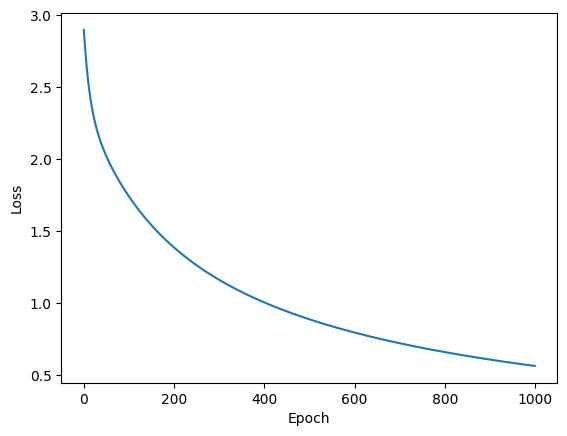

y=
 [[0.0079]
 [0.1469]
 [0.1481]
 [0.7896]] 



In [18]:
# inputs
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# labels (AND function)
t = np.array([[0],
              [0],
              [0],
              [1]])

#model
input_size = x.shape[1]     # the num of input column
output_size = t.shape[1]    # the num of target column
net = Model1(input_size, output_size)   # neural network model
optimizer = SGD(learning_rate = 0.1) # for update parameters

Epoch = 1000    # the number of training
loss = []       # for recording loss values at each epoch

#learning process
for i in range(Epoch):
    l = net.loss(x, t)                  # forward calculation
    net.backward()                      # backward propagation
    optimizer.update(net.get_layers())  # update parameters
    loss.append(l)                      # record current loss

# draw the loss graph
plt.plot(loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

y = net.predict(x)
print("y=\n", y, "\n")

## **Example 4.6** Implementing Model2 class (two linear layers)

In [19]:
from collections import OrderedDict

class Model2:
    def __init__(self, input_size, hidden_size, output_size):
        #initialize weights and biases
        W1 = np.random.randn(input_size, hidden_size)  #initialize weights with random value
        b1 = np.zeros(hidden_size)  #initialize biases with 0
        W2 = np.random.randn(hidden_size, output_size)  #initialize weights with random value
        b2 = np.zeros(output_size)  #initialize biases with 0

        #neural network model definition
        self.layers = OrderedDict()
        self.layers['linear1'] = Linear(W1, b1) # Linear layer
        self.layers['sigmoid1'] = Sigmoid()     # Sigmoid layer
        self.layers['linear2'] = Linear(W2, b2) # Linear layer
        self.layers['sigmoid2'] = Sigmoid()     # Sigmoid layer
        self.loss_layer = BinaryCrossentropy()  # Binary Crossentropy layer

    def get_layers(self):
        return self.layers

    # forward calculation
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    def loss(self, x, t):
        y = self.predict(x)
        return self.loss_layer.forward(y, t)  # get Loss and return

    # backward calculation
    def backward(self):
        dL = self.loss_layer.backward() # MSE layer
        for layer in reversed(self.layers.values()):
            dL = layer.backward(dL)

## **Example 4.7** Learning XOR function with Model2


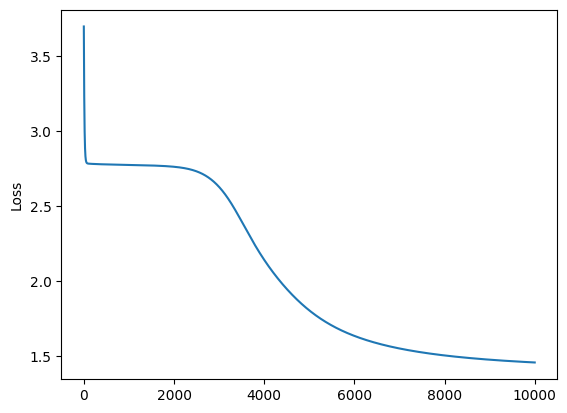

y=
 [[0.0134]
 [0.5   ]
 [0.966 ]
 [0.5117]] 



In [20]:
# inputs
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

#correct answers (labels)
t = np.array([[0],
              [1],
              [1],
              [0]])

#model
input_size = x.shape[1]
hidden_size = 2         # hyper parameter
output_size = t.shape[1]
net = Model2(input_size, hidden_size, output_size)  # neural network model
optimizer = SGD(learning_rate = 0.1)                # for update parameters

Epoch = 10000    # the number of training
loss = []       # for recording loss values at each epoch

#learning process
for i in range(Epoch):
    l = net.loss(x, t)                  # forward calculation
    net.backward()                      # backward propagation
    optimizer.update(net.get_layers())  # update parameters
    loss.append(l)                      # record current loss

# draw the loss graph
plt.plot(loss)
plt.ylabel("Loss")
plt.show()

y = net.predict(x)
print("y=\n", y, "\n")

## 🤔 **Exercise 4.4**

Construct a neural network with 2 input copy nodes, 2 hidden neurons, and 2 output neurons using Model2 class. Then learning the neural network for HA (Half adder) function based on the backpropagation algorithm. The truth table for HA is shown below. After learning, please check the loss graph, outputs, weights and biases.

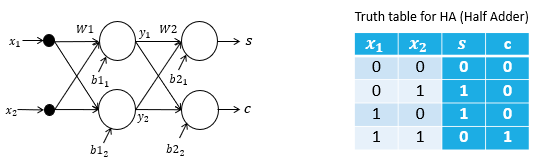

In [21]:
# inputs
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

#correct answers (labels)
t = np.array([[0, 0],
              [1, 0],
              [1, 0],
              [0, 1]])

## 🤔 **Exercise 4.5**

Construct a neural network with 3 input copy nodes, 3 hidden neurons, and 1 output neuron using Model2 class. Then learning the neural network for 3-input XOR function. The truth table for 3-input XOR is shown below. After learning, please check the loss graph, outputs, weights and biases.

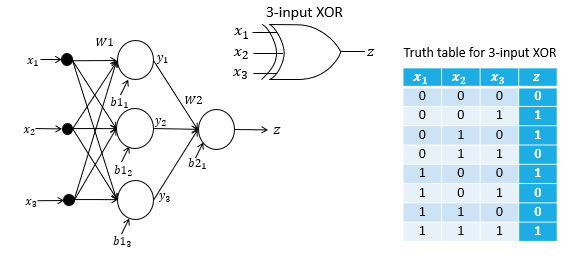

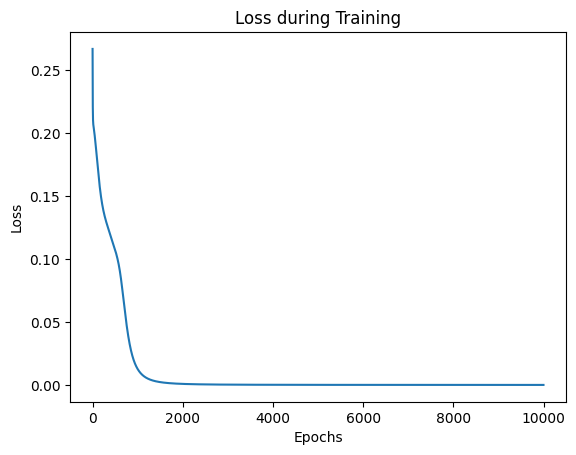

Predicted outputs:
[[5.6497e-03 4.4876e-06]
 [9.9592e-01 1.0278e-03]
 [9.9592e-01 1.0277e-03]
 [5.7268e-03 9.9748e-01]]

Weights and biases after training:
Weights (hidden layer): [[ 7.623  -7.3495]
 [ 7.6232 -7.3496]]
Biases (hidden layer): [-3.5649 10.94  ]
Weights (output layer): [[ 11.4864   5.3107]
 [ 11.4167 -13.4361]]
Biases (output layer): [-16.9031   0.9755]


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Model2 class
class Model2:
    def __init__(self, input_dim, hidden_dim, output_dim):
        # Initialize weights and biases for the hidden layer
        self.w1 = np.random.randn(input_dim, hidden_dim)
        self.b1 = np.zeros(hidden_dim)
        # Initialize weights and biases for the output layer
        self.w2 = np.random.randn(hidden_dim, output_dim)
        self.b2 = np.zeros(output_dim)

    def forward(self, x):
        # Forward pass through the hidden layer
        self.z1 = np.dot(x, self.w1) + self.b1
        self.a1 = 1 / (1 + np.exp(-self.z1))  # Sigmoid activation function

        # Forward through the output layer
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        y = 1 / (1 + np.exp(-self.z2))  # Sigmoid activation function
        return y

    def backward(self, x, t, y, lr=0.1):
        # Calculate the error at the output layer
        error_output = y - t

        # Calculate gradients for weights and biases at the output layer
        d_w2 = np.dot(self.a1.T, error_output)
        d_b2 = np.sum(error_output, axis=0)

        # Calculate the error at the hidden layer
        error_hidden = np.dot(error_output, self.w2.T) * (self.a1 * (1 - self.a1))

        # Calculate gradients for weights and biases at the hidden layer
        d_w1 = np.dot(x.T, error_hidden)
        d_b1 = np.sum(error_hidden, axis=0)

        # Update the weights and biases
        self.w2 -= lr * d_w2
        self.b2 -= lr * d_b2
        self.w1 -= lr * d_w1
        self.b1 -= lr * d_b1

    def train(self, x, t, epochs=1000, lr=0.1):
        loss_history = []
        for epoch in range(epochs):
            y = self.forward(x)
            self.backward(x, t, y, lr)
            loss = np.mean((y - t) ** 2)
            loss_history.append(loss)
        return loss_history

# HA (Half Adder) Truth Table
x = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

t = np.array([[0, 0],
              [1, 0],
              [1, 0],
              [0, 1]])

# Initialize the model
model = Model2(input_dim=2, hidden_dim=2, output_dim=2)

# Train the model
loss_history = model.train(x, t, epochs=10000, lr=0.1)

# Plot the loss graph
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss during Training')
plt.show()

# Test the model and print the outputs
y = model.forward(x)
print("Predicted outputs:")
print(y)

# Print the weights and biases
print("\nWeights and biases after training:")
print("Weights (hidden layer):", model.w1)
print("Biases (hidden layer):", model.b1)
print("Weights (output layer):", model.w2)
print("Biases (output layer):", model.b2)


## 🤔 **Exercise 4.6**

Create a two-category (binary) classification problem by removing one category from the Iris dataset. Make and train neural network model and find the accuracy.


In [23]:
#import datasets
from sklearn.datasets import load_iris

iris = load_iris()  #load dataset

df_iris = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df_iris["target"] = iris.target

df_iris = df_iris.query("target != 2")  # drop target == 2 (Iris-Virginica)
display(df_iris)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


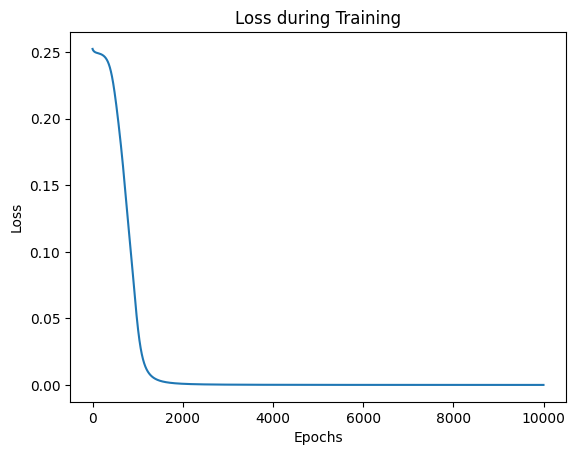

Predicted outputs:
[[0.003 ]
 [0.9971]
 [0.9971]
 [0.0026]
 [0.9943]
 [0.0026]
 [0.0026]
 [0.9977]]

Weights and biases after training:
Weights (hidden layer): [[ 8.5556 -6.8744 -6.244 ]
 [-8.2727  7.1453  5.5204]
 [-8.2717  7.1451  5.5202]]
Biases (hidden layer): [ 3.9172  3.4572 -8.6787]
Weights (output layer): [[-12.9999]
 [-11.9817]
 [-13.6908]]
Biases (output layer): [18.5416]


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Model2 class
class Model2:
    def __init__(self, input_dim, hidden_dim, output_dim):
        # Initialize weights and biases for the hidden layer
        self.w1 = np.random.randn(input_dim, hidden_dim)
        self.b1 = np.zeros(hidden_dim)
        # Initialize weights and biases for the output layer
        self.w2 = np.random.randn(hidden_dim, output_dim)
        self.b2 = np.zeros(output_dim)

    def forward(self, x):
        # Forward pass through the hidden layer
        self.z1 = np.dot(x, self.w1) + self.b1
        self.a1 = 1 / (1 + np.exp(-self.z1))  # Sigmoid activation function

        # Forward pass through the output layer
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        y = 1 / (1 + np.exp(-self.z2))  # Sigmoid activation function
        return y

    def backward(self, x, t, y, lr=0.1):
        # Calculate the error at the output layer
        error_output = y - t

        # Calculate gradients for weights and biases at the output layer
        d_w2 = np.dot(self.a1.T, error_output)
        d_b2 = np.sum(error_output, axis=0)

        # Calculate the error at the hidden layer
        error_hidden = np.dot(error_output, self.w2.T) * (self.a1 * (1 - self.a1))

        # Calculate gradients for weights and biases at the hidden layer
        d_w1 = np.dot(x.T, error_hidden)
        d_b1 = np.sum(error_hidden, axis=0)

        # Update the weights and biases
        self.w2 -= lr * d_w2
        self.b2 -= lr * d_b2
        self.w1 -= lr * d_w1
        self.b1 -= lr * d_b1

    def train(self, x, t, epochs=1000, lr=0.1):
        loss_history = []
        for epoch in range(epochs):
            y = self.forward(x)
            self.backward(x, t, y, lr)
            loss = np.mean((y - t) ** 2)
            loss_history.append(loss)
        return loss_history

# 3-input XOR Truth Table
x = np.array([[0, 0, 0],
              [0, 0, 1],
              [0, 1, 0],
              [0, 1, 1],
              [1, 0, 0],
              [1, 0, 1],
              [1, 1, 0],
              [1, 1, 1]])

# Correct answers (labels)
t = np.array([[0],
              [1],
              [1],
              [0],
              [1],
              [0],
              [0],
              [1]])

# Initialize the model
model = Model2(input_dim=3, hidden_dim=3, output_dim=1)

# Train the model
loss_history = model.train(x, t, epochs=10000, lr=0.1)

# Plot the loss graph
plt.plot(loss_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss during Training')
plt.show()

# Test the model and print the outputs
y = model.forward(x)
print("Predicted outputs:")
print(y)

# Print the weights and biases
print("\nWeights and biases after training:")
print("Weights (hidden layer):", model.w1)
print("Biases (hidden layer):", model.b1)
print("Weights (output layer):", model.w2)
print("Biases (output layer):", model.b2)


In [25]:
#import datasets
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame from the data
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris["target"] = iris.target

# Drop rows where target == 2 (Iris-Virginica)
df_iris = df_iris.query("target != 2")

# Display the resulting DataFrame
display(df_iris)

# Inputs (features)
x = df_iris.drop(columns=["target"]).values

# Targets (labels)
t = df_iris["target"].values

# Split the data into training and testing sets
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.2, random_state=42)

# Define the model
class SimpleNN:
    def __init__(self, input_dim):
        self.w = np.random.randn(input_dim, 1)
        self.b = np.zeros(1)

    def forward(self, x):
        linear_output = np.dot(x, self.w) + self.b
        y = 1 / (1 + np.exp(-linear_output))  # Sigmoid activation
        return y

    def train(self, x, t, epochs=1000, lr=0.1):
        for _ in range(epochs):
            y = self.forward(x)
            error = y - t.reshape(-1, 1)
            self.w -= lr * np.dot(x.T, error) / x.shape[0]
            self.b -= lr * np.sum(error) / x.shape[0]

# Initialize the model
model = SimpleNN(input_dim=x.shape[1])

# Train the model
model.train(x_train, t_train)

# Make predictions on the test set
y_test = model.forward(x_test)

# Calculate accuracy
prediction = y_test > 0.5  # if y is greater than 0.5, the prediction will be 1, otherwise 0.
accuracy = np.sum(prediction.flatten() == t_test) / t_test.shape[0]

# Print accuracy
print("Accuracy:", accuracy)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


Accuracy: 1.0


## 🤔 **Exercise 4.7**

Breast cancer wisconsin dataset is a binary classification problem dataset that predicts whether a person has breast cancer from 30 types of features. Make and train neural network model and find the accuracy.

Hint: Standardization should be applied.



In [26]:
#import datasets
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()  #load dataset
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [27]:
df_cancer = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
df_cancer["target"] = cancer.target
display(df_cancer)

df_cancer["target"].value_counts()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


,count
target,
1,357
0,212


In [28]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

array([[<Axes: title={'center': 'mean radius'}>,
        <Axes: title={'center': 'mean texture'}>,
        <Axes: title={'center': 'mean perimeter'}>,
        <Axes: title={'center': 'mean area'}>,
        <Axes: title={'center': 'mean smoothness'}>,
        <Axes: title={'center': 'mean compactness'}>],
       [<Axes: title={'center': 'mean concavity'}>,
        <Axes: title={'center': 'mean concave points'}>,
        <Axes: title={'center': 'mean symmetry'}>,
        <Axes: title={'center': 'mean fractal dimension'}>,
        <Axes: title={'center': 'radius error'}>,
        <Axes: title={'center': 'texture error'}>],
       [<Axes: title={'center': 'perimeter error'}>,
        <Axes: title={'center': 'area error'}>,
        <Axes: title={'center': 'smoothness error'}>,
        <Axes: title={'center': 'compactness error'}>,
        <Axes: title={'center': 'concavity error'}>,
        <Axes: title={'center': 'concave points error'}>],
       [<Axes: title={'center': 'symmetry error'}>

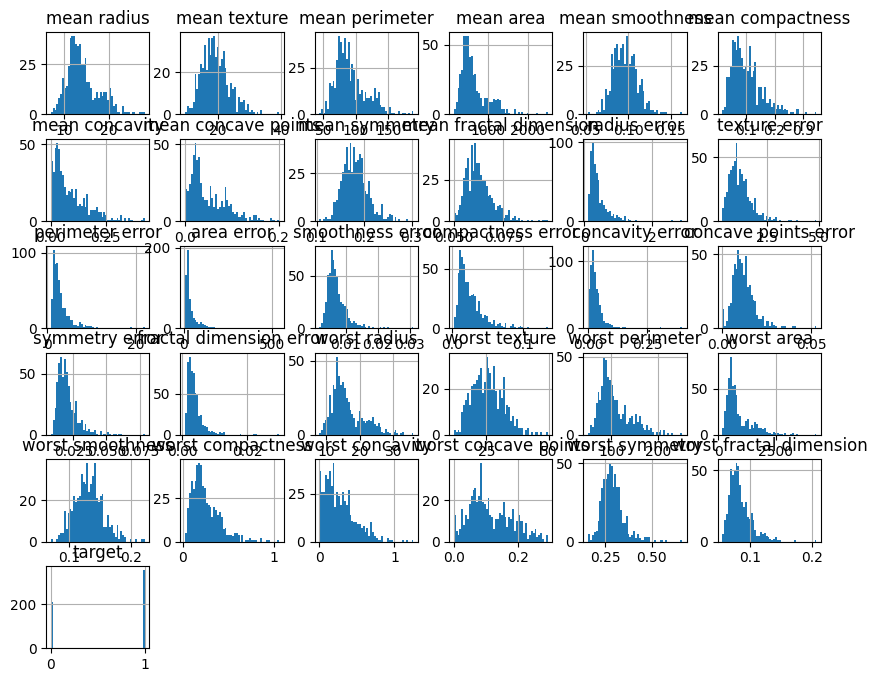

In [29]:
df_cancer.hist(bins=50, figsize=[10,8])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


target
1    357
0    212
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 

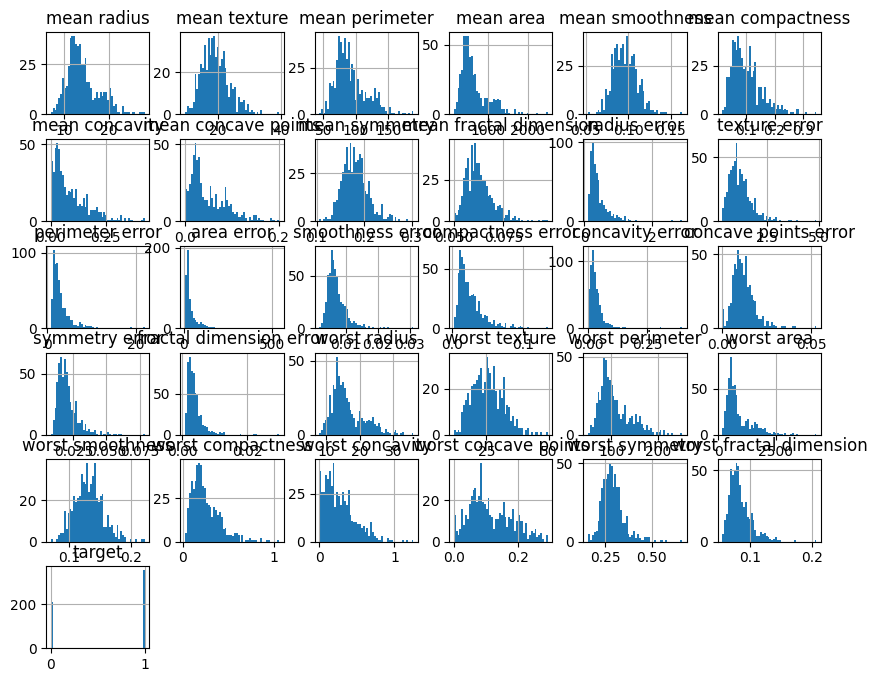

In [30]:
#import datasets
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
print(cancer.DESCR)

# Create a DataFrame from the data
df_cancer = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df_cancer["target"] = cancer.target

# Display the resulting DataFrame
display(df_cancer)

# Show target distribution and info
print(df_cancer["target"].value_counts())
df_cancer.info()

# Plot histograms of the features
df_cancer.hist(bins=50, figsize=[10,8])

# Inputs (features)
x = df_cancer.drop(columns=["target"]).values

# Targets (labels)
t = df_cancer["target"].values

# Standardize the features
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Split the data into training and testing sets
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.2, random_state=42)

# Define the model
class SimpleNN:
    def __init__(self, input_dim):
        self.w = np.random.randn(input_dim, 1)
        self.b = np.zeros(1)

    def forward(self, x):
        linear_output = np.dot(x, self.w) + self.b
        y = 1 / (1 + np.exp(-linear_output))  # Sigmoid activation
        return y

    def train(self, x, t, epochs=1000, lr=0.01):
        for _ in range(epochs):
            y = self.forward(x)
            error = y - t.reshape(-1, 1)
            self.w -= lr * np.dot(x.T, error) / x.shape[0]
            self.b -= lr * np.sum(error) / x.shape[0]

# Initialize the model
model = SimpleNN(input_dim=x.shape[1])

# Train the model
model.train(x_train, t_train)

# Make predictions on the test set
y_test = model.forward(x_test)

# Calculate accuracy
prediction = y_test > 0.5  # if y is greater than 0.5, the prediction will be 1, otherwise 0.
accuracy = np.sum(prediction.flatten() == t_test) / t_test.shape[0]

# Print accuracy
print("Accuracy:", accuracy)
